# Home Credit Default Risk

## Predicting how capable each applicant is of repaying a loan?

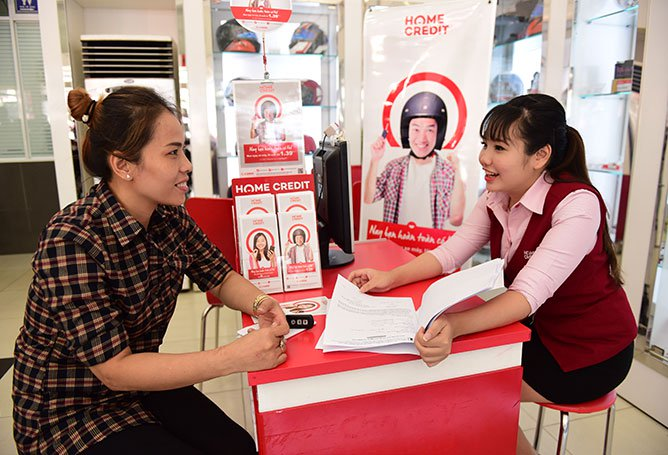

Introduction: Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

https://www.kaggle.com/c/home-credit-default-risk

The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.

Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

## Import necessary libraries.

In [2]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns


# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# display plots on the notebook itself
%matplotlib inline

## Read the data files

In [3]:
train = pd.read_csv("../dataset/all/application_train.csv")
test = pd.read_csv("../dataset/all/application_test.csv")

new_test = pd.read_csv("../dataset/all/new_test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## How is the statistic?

In [5]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## How are the target labels spread?

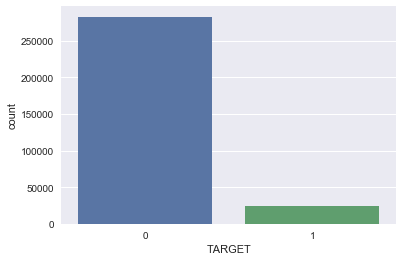

In [5]:
sns.countplot(train.TARGET)

In [6]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### This is clearly an imbalanced target. There are more number of people who returned - 0 as opposed to people who had difficulties -1. About 91.92 % of applicants repayed!

## What are the dimensions of Train and Test dataset?

In [7]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))
print("The test dataset dimensions are as follows: {}".format(new_test.shape))

The train dataset dimensions are as follows: (307511, 122)
The test dataset dimensions are as follows: (48744, 121)
The test dataset dimensions are as follows: (124, 121)


## Look at the train dataset

In [8]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Look at the test dataset

In [9]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Look at the New Test dataset

In [10]:
new_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,0,0,24700.5,351000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,0,0,35698.5,1129500,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,0,0,6750.0,135000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,0,0,29686.5,297000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,0,0,21865.5,513000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### As expected, test dataset contains all the columns except the target label.

## What are the missing values and their column names?

In [11]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]
    

In [12]:
missing_columns(train)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,214865,0.698723,69.9
COMMONAREA_AVG,214865,0.698723,69.9
COMMONAREA_MODE,214865,0.698723,69.9
NONLIVINGAPARTMENTS_MODE,213514,0.694330,69.4
NONLIVINGAPARTMENTS_MEDI,213514,0.694330,69.4
NONLIVINGAPARTMENTS_AVG,213514,0.694330,69.4
FONDKAPREMONT_MODE,210295,0.683862,68.4
LIVINGAPARTMENTS_MEDI,210199,0.683550,68.4
LIVINGAPARTMENTS_MODE,210199,0.683550,68.4
LIVINGAPARTMENTS_AVG,210199,0.683550,68.4


In [13]:
missing_columns(test)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,33495,0.687161,68.7
COMMONAREA_AVG,33495,0.687161,68.7
COMMONAREA_MODE,33495,0.687161,68.7
NONLIVINGAPARTMENTS_MODE,33347,0.684125,68.4
NONLIVINGAPARTMENTS_MEDI,33347,0.684125,68.4
NONLIVINGAPARTMENTS_AVG,33347,0.684125,68.4
FONDKAPREMONT_MODE,32797,0.672842,67.3
LIVINGAPARTMENTS_AVG,32780,0.672493,67.2
LIVINGAPARTMENTS_MEDI,32780,0.672493,67.2
LIVINGAPARTMENTS_MODE,32780,0.672493,67.2


In [14]:
missing_columns(new_test)

,Missing Count,Missing Count Ratio,Missing Count %
NONLIVINGAPARTMENTS_MEDI,91,0.733871,73.4
NONLIVINGAPARTMENTS_AVG,91,0.733871,73.4
NONLIVINGAPARTMENTS_MODE,91,0.733871,73.4
COMMONAREA_AVG,90,0.725806,72.6
LIVINGAPARTMENTS_AVG,90,0.725806,72.6
LIVINGAPARTMENTS_MODE,90,0.725806,72.6
COMMONAREA_MODE,90,0.725806,72.6
LIVINGAPARTMENTS_MEDI,90,0.725806,72.6
COMMONAREA_MEDI,90,0.725806,72.6
FONDKAPREMONT_MODE,89,0.717742,71.8


We will have to handle these missing values (known as imputation). Other option would be to drop all those columns where there are large number of missing values. Unless we know the feature importance, it is not possible to make a call on which columns to keep which ones to drop.

## What are the different datatypes of columns? - How many floats, integers, categoricals?

In [15]:
print("Train dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test dataset: \n{}".format(test.dtypes.value_counts())) 
print()
print("Test dataset: \n{}".format(new_test.dtypes.value_counts())) 

Train dataset: 
float64    65
int64      41
object     16
dtype: int64

Test dataset: 
float64    65
int64      40
object     16
dtype: int64

Test dataset: 
int64      53
float64    52
object     16
dtype: int64


#### Turn every column data type of testing set similar to training set. Match datatypes of test in alignment with train. 

In [6]:
def match_dtypes(training_df,testing_df,target_name='TARGET'):
    """
    This function converts dataframe to match columns in accordance with the 
    training dataframe.
    """
    for column_name in training_df.drop([target_name],axis=1).columns:
         testing_df[column_name]= testing_df[column_name].astype(train[column_name].dtype)
        
    return testing_df
    

In [7]:
new_test = match_dtypes(train,new_test)

In [18]:
print("Train dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test dataset: \n{}".format(test.dtypes.value_counts())) 
print()
print("Test dataset: \n{}".format(new_test.dtypes.value_counts())) 

Train dataset: 
float64    65
int64      41
object     16
dtype: int64

Test dataset: 
float64    65
int64      40
object     16
dtype: int64

Test dataset: 
float64    65
int64      40
object     16
dtype: int64


### In test dataset, 40 int64 indicates that the target label is missing - which is obvious.

### What are the different kinds of classes in every categorical column?

In [19]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [20]:
test.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [21]:
new_test.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                6
NAME_INCOME_TYPE               4
NAME_EDUCATION_TYPE            4
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              4
OCCUPATION_TYPE               15
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             27
FONDKAPREMONT_MODE             3
HOUSETYPE_MODE                 2
WALLSMATERIAL_MODE             5
EMERGENCYSTATE_MODE            1
dtype: int64

## Handling Categorical variables - Label Encoding and One Hot Encoding.

Some machine learning models can't learn if provided with text categories. The categorical variables are to be converted into
numerical equivalent, which is done by Label encoding and One hot encoding.

<b>Label encoding:</b> It is the process of assigning each unique category in a categorical variable with an integer. No new columns are created. 

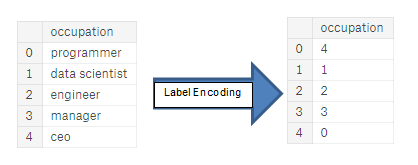

In [8]:
# Create a label encode object having less than or equal to 2 unique values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

# iterate through all the categorical columns
for col in train.select_dtypes('object').columns:
    
    # select only those columns where number of unique values in the category is less than or equal to 2 
    if pd.Series.nunique(train[col]) <= 2:
        train[col] = le.fit_transform(train[col].astype(str))
        test[col] = le.fit_transform(test[col].astype(str))
        new_test[col] = le.fit_transform(new_test[col].astype(str))

        transform_counter+=1
        
print("Label encoded {} columns.".format(transform_counter))    

Label encoded 4 columns.


<b>One-hot encoding:</b> create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

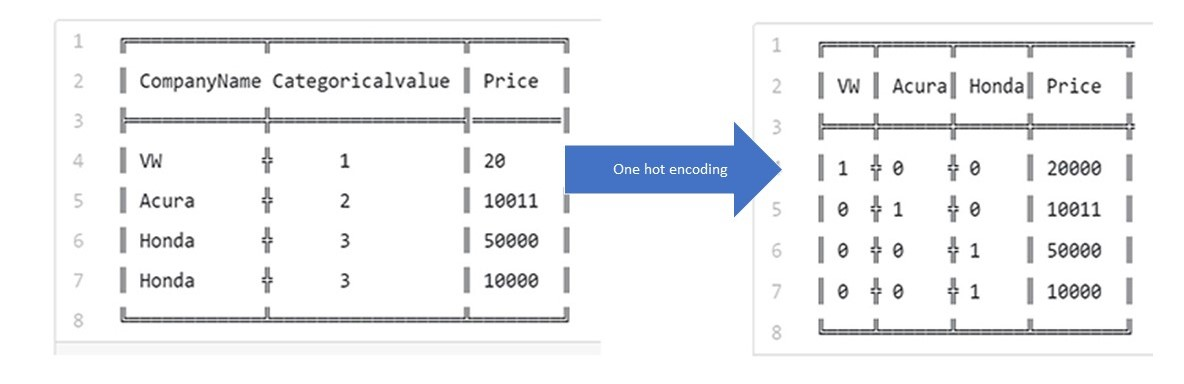
Credit : https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [9]:
# one-hot encode of categorical variables
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)
new_test = pd.get_dummies(new_test,drop_first=True)

One hot encoding would added more columns, checking how many there are: 

In [10]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)
print('New Testing Features shape: ',new_test.shape)

Training Features shape:  (307511, 230)
Testing Features shape:  (48744, 226)
New Testing Features shape:  (124, 181)


There is a mismatch in the count of columns for test and train. This can be fixed by aligning them.

In [11]:
# collect the target labels to support the aligning 

target = train['TARGET']

## Ensure train and test have the same number of columns by aligning.

In [12]:
train, test = train.align(test,axis=1,join='inner')

Add the stored target column back into the train dataset.

In [13]:
train['TARGET'] = target

Since there are extra columns in the training set and those columns are missing in the new_testing set, let us add those columns and assign them to dummy value of 0.

In [14]:
def match_columns(training_set,testing_set,target_label='TARGET'):
    """Matches the count of columns from training set to testing set by adding extra cols and setting them to 0."""
    
    for column in training_set.drop([target_label],axis=1).columns:
        if column not in testing_set.columns:
            testing_set[column]=0
    
    return testing_set        

In [15]:
new_test=match_columns(train,new_test)
new_test.shape

(124, 226)

In [16]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)
print('Testing Features shape: ', new_test.shape)

Training Features shape:  (307511, 227)
Testing Features shape:  (48744, 226)
Testing Features shape:  (124, 226)


<h3>On the look for Anomalies</h3> 
</br>

One problem we always want to be on the lookout for is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies checking is by looking at the statistics of a column using the describe method. The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can multiply by -1 and divide by the number of days in a year:

## How old are clients?

In [31]:
(train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Ages seem to be fine, nothing in particluar seems to be off.

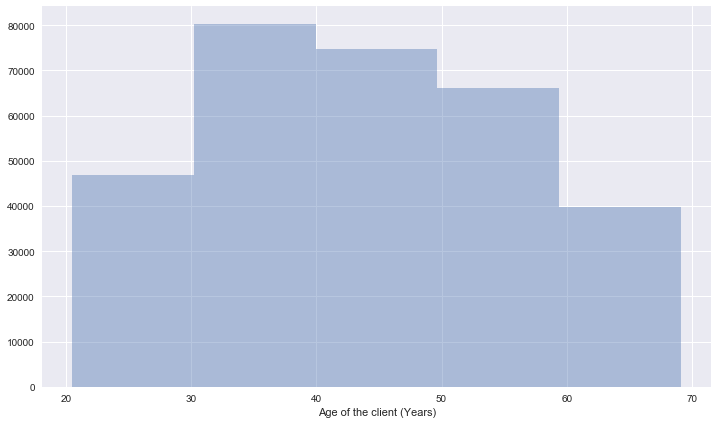

In [32]:
fig, ax = plt.subplots(figsize =(12,7))
sns.distplot(train['DAYS_BIRTH']/-365,bins=5,kde=False)
plt.xlabel("Age of the client (Years)")

People in the age range 30-40 years are the most applicants. Which seems pretty normal.

### How many years has it been since the applicant started working? 
The DAYS_EMPLOYED column is negative because the days are relative only to the time of the application. -ve means so many days since the application, the client has been working. +ve means, the client is about to work in those many days. In an ideal world, the -ve has significance, +ve could mean anything from client starts working to client can be fired and resumes working, which in anyway doesn't make sense because the loan might not be given to those clients without any work.

In [33]:
(train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

This doesn't seem right, the maximum value (besides being positive) is about 1000 years!

### Who are these special people who got employed 1000 years after issuance of the loan? 

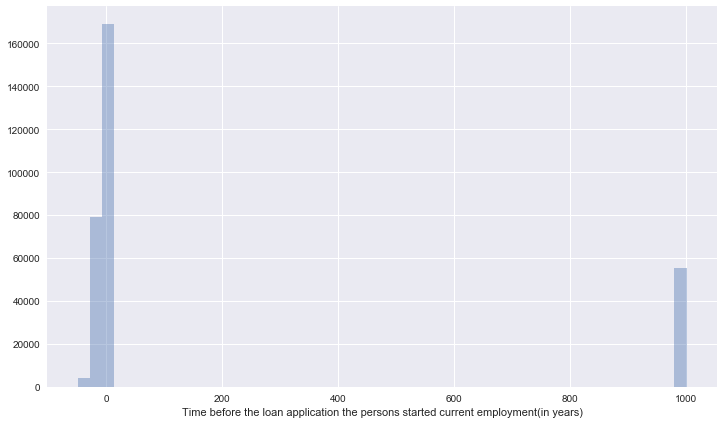

In [34]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(train['DAYS_EMPLOYED']/365,kde=False)
plt.xlabel("Time before the loan application the persons started current employment(in years)")

So, how many of these 1000 year anomalies?

In [17]:
# find the number of records where DAYS_EMPLOYED is between [900,1100] years. 
thousand_anomalies = train[(train['DAYS_EMPLOYED']/365>=900) & (train['DAYS_EMPLOYED']/365<=1100)]
len(thousand_anomalies)

55374

## Lets look their ability to repay.

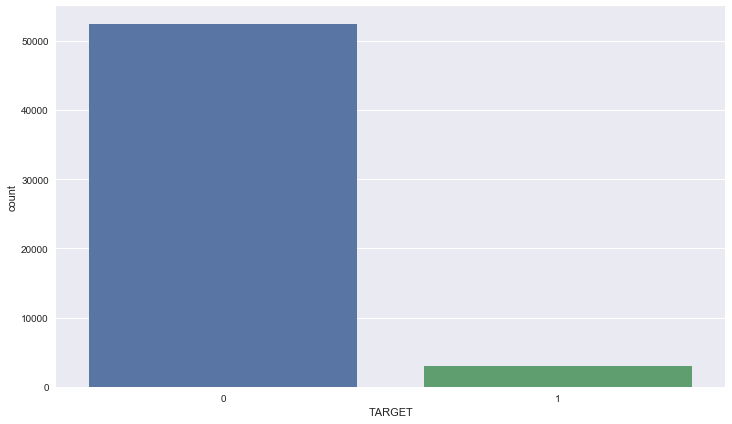

In [36]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='TARGET',data=thousand_anomalies)

## Most anomalies were able to repay on time. But how can they be contrasted in relation to non anomalies?

In [18]:
# get the index of anomalies and non anomalies
anomalies_index = pd.Index(thousand_anomalies.index)
non_anomalies_index = train.index.difference(anomalies_index)

In [19]:
# get the anomalies records
non_anomalies = train.iloc[non_anomalies_index]

In [20]:
# get the anomaly targets
anomalies_target = thousand_anomalies['TARGET'].value_counts()
non_anomalies_target = non_anomalies['TARGET'].value_counts()

In [21]:
# find the default rate for anomalies and non anomalies

print("Anomalies have a default rate of {}%".format(100*anomalies_target[1]/(anomalies_target[1]+anomalies_target[0])))
print("Non Anomalies have a default rate of {}%".format(100*non_anomalies_target[1]/(non_anomalies_target[1]+non_anomalies_target[0])))

Anomalies have a default rate of 5.399646043269405%
Non Anomalies have a default rate of 8.659974537652149%


So surprisingly anomalies have lesser default rate!

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

In [22]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243: np.nan})

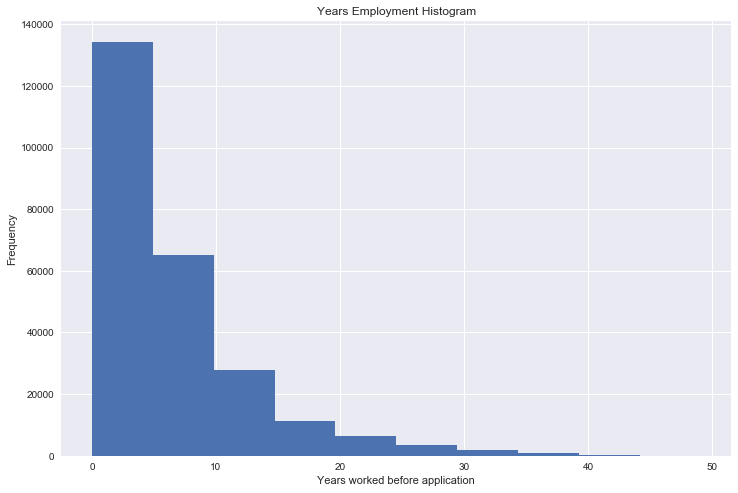

In [23]:
# Looking at the years employed for anomalies

plt.figure(figsize=(12,8))
(train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')
plt.xlabel("Years worked before application")

Now it all seems normal!

In [24]:
# Create an anomalous flag column
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace({365243: np.nan})

# Create an anomalous flag column
new_test['DAYS_EMPLOYED_ANOM'] = new_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
new_test['DAYS_EMPLOYED'] = new_test['DAYS_EMPLOYED'].replace({365243: np.nan})


## Finding out the most correlated features for the TARGET variable. 

## Understanding Correlation

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

A correlation coefficient is a statistical measure of the degree to which changes to the value of one variable predict change to the value of another. When the fluctuation of one variable reliably predicts a similar fluctuation in another variable, there’s often a tendency to think that means that the change in one causes the change in the other. However, correlation does not imply causation. There may be, for example, an unknown factor that influences both variables similarly.

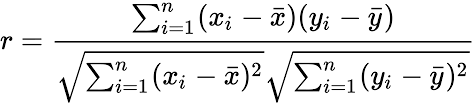

To describe the strength of the
correlation using the guide that Evans (1996) suggests for the absolute value of r:
<br/>
 .00-.19 “very weak”
 <br/>
 .20-.39 “weak”
 <br/>
 .40-.59 “moderate”
 <br/>
 .60-.79 “strong”
 <br/>
 .80-1.0 “very strong”



http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf <br/>
https://whatis.techtarget.com/definition/correlation

In [25]:
corr_train = train.corr()['TARGET']

## Looking at the top 10 most positively and negatively correlated features we get:

In [26]:
print(corr_train.sort_values().tail(10))
corr_train.sort_values().head(10)

REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
Name: TARGET, dtype: float64

### Since EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1 and DAYS_BIRTH are highly correlated (Relatively), let us also explore the possibility of having them as interaction variables.


## Initially filling up the missing values for the most correlated variables.

In [27]:
from sklearn.preprocessing import Imputer

In [28]:
poly_fitting_vars = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1','DAYS_BIRTH']

In [29]:
imputer = Imputer(missing_values='NaN', strategy='median')

In [30]:
train[poly_fitting_vars] = imputer.fit_transform(train[poly_fitting_vars])

In [31]:
train[poly_fitting_vars].shape

(307511, 4)

In [32]:
test[poly_fitting_vars] = imputer.transform(test[poly_fitting_vars])

In [33]:
test[poly_fitting_vars].shape

(48744, 4)

In [34]:
new_test[poly_fitting_vars] = imputer.transform(new_test[poly_fitting_vars])

In [35]:
new_test[poly_fitting_vars].shape

(124, 4)

## Let us generate valuable features - interaction variables.

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly_feat = PolynomialFeatures(degree=4)

#### I also tried for polynomial degree of order 10. Couldn't find much improvement from degree 4 to 10. Fun fact: order of 10 created over 1000 interaction variables! 

In [39]:
poly_interaction_train = poly_feat.fit_transform(train[poly_fitting_vars])

In [40]:
poly_interaction_train.shape

(307511, 70)

In [41]:
poly_interaction_test = poly_feat.fit_transform(test[poly_fitting_vars])

In [42]:
poly_interaction_test.shape

(48744, 70)

In [43]:
poly_interaction_new_test = poly_feat.fit_transform(new_test[poly_fitting_vars])

In [44]:
poly_interaction_new_test.shape

(124, 70)

## Build a dataframe out of interaction variables only!

In [45]:
poly_interaction_train = pd.DataFrame(poly_interaction_train,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [46]:
poly_interaction_train.shape

(307511, 70)

In [47]:
poly_interaction_test =  pd.DataFrame(poly_interaction_test,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [48]:
poly_interaction_test.shape

(48744, 70)

In [49]:
poly_interaction_new_test =  pd.DataFrame(poly_interaction_new_test,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [50]:
poly_interaction_new_test.shape

(124, 70)

## Add the 'TARGET' column which is later used for looking up correlations with the interaction variables.

In [51]:
poly_interaction_train['TARGET'] = train['TARGET']

In [52]:
interaction = poly_interaction_train.corr()['TARGET'].sort_values()

## Which are the most correlated interaction variables?

In [53]:
# looking at the top 15 most positive and negative correlated interaction variables.
print(interaction.tail(15))
(interaction.head(15))

EXT_SOURCE_2^3 DAYS_BIRTH                            0.140230
EXT_SOURCE_3^2 DAYS_BIRTH                            0.141777
EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH               0.144206
EXT_SOURCE_2^2 DAYS_BIRTH                            0.149313
EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH               0.149813
EXT_SOURCE_3 DAYS_BIRTH                              0.150109
EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH                 0.151816
EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH                 0.155891
EXT_SOURCE_2 DAYS_BIRTH                              0.156873
EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH               0.164466
EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH               0.168159
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH    0.174173
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH                 0.181283
TARGET                                               1.000000
1                                                         NaN
Name: TARGET, dtype: float64


EXT_SOURCE_3 EXT_SOURCE_2                  -0.193939
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1     -0.189605
EXT_SOURCE_3 EXT_SOURCE_2^2                -0.176428
EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1   -0.174534
EXT_SOURCE_3^2 EXT_SOURCE_2                -0.172282
EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1   -0.170938
EXT_SOURCE_2 EXT_SOURCE_1                  -0.166625
EXT_SOURCE_3 EXT_SOURCE_1                  -0.164065
EXT_SOURCE_3^2 EXT_SOURCE_2^2              -0.162923
EXT_SOURCE_3 EXT_SOURCE_2^3                -0.161994
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2   -0.160677
EXT_SOURCE_2                               -0.160295
EXT_SOURCE_2^2 EXT_SOURCE_1                -0.156867
EXT_SOURCE_3                               -0.155892
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2     -0.154886
Name: TARGET, dtype: float64

## Get the names of the columns which have the highest correlation - '1' and 'TARGET' can be dropped.

In [54]:
set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'}))

{'EXT_SOURCE_2',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^3 DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3^2 EXT_SOURCE_2^2'

## Choose the selected columns which have highest correlation to 'TARGET'. Columns '1' and 'TARGET' are not necessary!

In [55]:
selected_inter_variables = list(set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'})))

In [56]:
# look at the selected features
poly_interaction_train[selected_inter_variables].head()

,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^3,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,...,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2^2 EXT_SOURCE_1
0,0.009637,-109.495390,0.036649,0.011573,0.000424,0.262949,-2487.756636,0.002534,0.003043,-15.261005,...,0.001343,-91.172960,3.280441e+06,-183.785678,-28.791659,-48.326185,0.000800,-206.575767,0.021834,0.005741
1,0.207254,-2793.283699,0.333073,0.166614,0.055495,0.622246,-10431.950422,0.128963,0.103675,-1495.178425,...,0.110938,-3474.605044,9.361535e+07,-4803.518937,-1738.108981,-2988.969365,0.064511,-3247.125160,0.193685,0.120520
2,0.225464,-7031.006802,0.405575,0.369159,0.149722,0.555912,-10587.901540,0.125338,0.205220,-5129.588365,...,0.164491,-4294.187521,1.471224e+08,-10137.567875,-3908.621640,-5635.596478,0.114084,-5357.456268,0.281290,0.156373
3,0.226462,-5147.479068,0.348166,0.270849,0.094300,0.650442,-12361.644326,0.147300,0.176171,-2755.323295,...,0.121220,-4303.904125,1.257541e+08,-5445.325225,-3348.134986,-3541.866544,0.114589,-6254.966447,0.329122,0.214075
4,0.055754,-5398.555790,0.172754,0.270849,0.046790,0.322738,-6432.819536,0.017994,0.087413,-2889.718701,...,0.029844,-1111.296208,6.863256e+07,-5710.929881,-1742.320648,-1843.135727,0.028212,-3254.993372,0.163305,0.052705


In [57]:
poly_interaction_test[selected_inter_variables].head()

,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^3,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,...,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2^2 EXT_SOURCE_1
0,0.099469,-2310.011305,0.125965,0.120057,0.015123,0.789654,-15193.739370,0.078546,0.094803,-368.491942,...,0.015867,-1913.883926,4.663438e+07,-489.615795,-1824.110478,-386.627243,0.074862,-11435.028416,0.594305,0.469296
1,0.036829,-4418.799416,0.126276,0.244619,0.030889,0.291656,-5268.465530,0.010741,0.071345,-1913.170762,...,0.015946,-665.278990,4.120477e+07,-3386.201665,-1288.767295,-987.604448,0.020808,-2976.631403,0.164783,0.048060
2,0.299203,-6194.955045,0.427564,0.309160,0.132186,0.699787,-14022.328504,0.209379,0.216346,-3785.063810,...,0.182811,-5995.438444,1.716760e+08,-7480.393855,-4335.147954,-5234.681105,0.151396,-7095.269204,0.354091,0.247788
3,0.159163,-4501.941285,0.312281,0.322119,0.100592,0.509677,-7123.246872,0.081122,0.164177,-2758.358532,...,0.097520,-2224.456866,6.099746e+07,-5246.681115,-2294.536289,-2674.113111,0.083677,-3744.932912,0.267955,0.136570
4,0.096997,-1410.972511,0.227860,0.108203,0.024655,0.425687,-5550.962315,0.041290,0.046061,-755.260075,...,0.051920,-1264.843931,3.874573e+07,-3736.229463,-600.633070,-1590.465410,0.019608,-1122.099233,0.086051,0.036631


In [58]:
poly_interaction_new_test[selected_inter_variables].head()

,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^3,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,...,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2^2 EXT_SOURCE_1
0,0.0,0.0,0.0,0.0,0.0,0.262949,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021834,0.005741
1,0.0,0.0,0.0,0.0,0.0,0.622246,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.193685,0.120520
2,0.0,0.0,0.0,0.0,0.0,0.555912,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281290,0.156373
3,0.0,0.0,0.0,0.0,0.0,0.650442,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329122,0.214075
4,0.0,0.0,0.0,0.0,0.0,0.322738,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163305,0.052705


## Get a list of unselected columns that are to be dropped.

In [59]:
unselected_cols = [element for element in poly_interaction_train.columns if element not in selected_inter_variables]

##  Drop the unselected columns of the interaction dataframes - train and test versions both.

In [60]:
poly_interaction_train = poly_interaction_train.drop(unselected_cols,axis=1)

In [61]:
poly_interaction_test = poly_interaction_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

In [62]:
poly_interaction_new_test = poly_interaction_new_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

## Merge polynomial features into the original dataframes using their indices.

#### Dropping columns 'EXT_SOURCE_2' and 'EXT_SOURCE_3' since they're already present in the source dataset.

In [63]:
train = train.join(poly_interaction_train.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [64]:
test = test.join(poly_interaction_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [65]:
new_test = new_test.join(poly_interaction_new_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

## What are their merged dataframe dimensions?

In [66]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))
print("The new test dataset dimensions are as follows: {}".format(new_test.shape))

The train dataset dimensions are as follows: (307511, 254)
The test dataset dimensions are as follows: (48744, 253)
The new test dataset dimensions are as follows: (124, 253)


# Domain Feature Engineering

### Industry expert opinion and metrics.

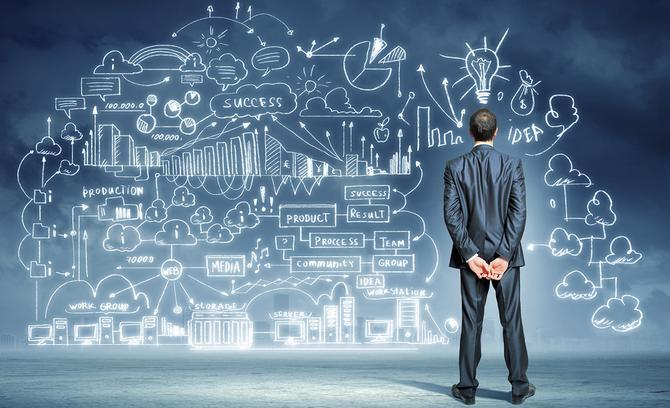

This article from Wells Fargo explains what factors are looked at while providing money to borrowers.
https://www.wellsfargo.com/financial-education/credit-management/five-c/

Here are the major factors accordingly:<br>
<b>Credit history:</b> Qualifying for the different types of credit hinges largely on your credit history — the track record you’ve established while managing credit and making payments over time. Your credit report is primarily a detailed list of your credit history, consisting of information provided by lenders that have extended credit to you. While information may vary from one credit reporting agency to another, the credit reports include the same types of information, such as the names of lenders that have extended credit to you, types of credit you have, your payment history, and more. 

In addition to the credit report, lenders may also use a credit score that is a numeric value – usually between 300 and 850 – based on the information contained in your credit report. The credit score serves as a risk indicator for the lender based on your credit history. Generally, the higher the score, the lower the risk. Credit bureau scores are often called "FICO® scores" because many credit bureau scores used in the U.S. are produced from software developed by Fair Isaac Corporation (FICO). While many lenders use credit scores to help them make their lending decisions, each lender has its own criteria, depending on the level of risk it finds acceptable for a given credit product.

<b>Capacity:</b> Lenders need to determine whether you can comfortably afford your payments. Your income and employment history are good indicators of your ability to repay outstanding debt. Income amount, stability, and type of income may all be considered. The ratio of your current and any new debt as compared to your before-tax income, known as debt-to-income ratio (DTI), may be evaluated.

<b>Collateral (when applying for secured loans):</b> Loans, lines of credit, or credit cards you apply for may be secured or unsecured. With a secured product, such as an auto or home equity loan, you pledge something you own as collateral. The value of your collateral will be evaluated, and any existing debt secured by that collateral will be subtracted from the value. The remaining equity will play a factor in the lending decision.

<b>Capital:</b> While your household income is expected to be the primary source of repayment, capital represents the savings, investments, and other assets that can help repay the loan. This can be helpful if you lose your job or experience other setbacks.

<b>Conditions:</b> Lenders may want to know how you plan to use the money and will consider the loan’s purpose, such as whether the loan will be used to purchase a vehicle or other property. Other factors, such as environmental and economic conditions, may also be considered. 

Since we don't consider credit history, we can asses other 4 C's.

Let us incorporate the following variables: 

1) <b>debt-to-income ratio(DIR) = Credit amount of the loan / Total Income = AMT_CREDIT/AMT_INCOME_TOTAL</b><br/>
2) <b>annuity-to-income ratio(AIR) = Loan annuity / Total Income = AMT_ANNUITY/AMT_INCOME_TOTAL</b><br/>
3) <b>annuity-to-credit ratio(ACR) = Loan annuity/ Credit amount of the loan = AMT_ANNUITY/AMT_CREDIT</b><br/>
4) <b>days-employed-to-age ratio(DAR) = Number of days employed/ Age of applicant = DAYS_EMPLOYED/DAYS_BIRTH</b><br/>


In [67]:
train['DIR'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']
train['AIR'] = train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']
train['ACR'] = train['AMT_ANNUITY']/train['AMT_CREDIT']
train['DAR'] = train['DAYS_EMPLOYED']/train['DAYS_BIRTH']

In [68]:
test['DIR'] = test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']
test['AIR'] = test['AMT_ANNUITY']/test['AMT_INCOME_TOTAL']
test['ACR'] = test['AMT_ANNUITY']/test['AMT_CREDIT']
test['DAR'] = test['DAYS_EMPLOYED']/test['DAYS_BIRTH']

In [69]:
new_test['DIR'] = new_test['AMT_CREDIT']/new_test['AMT_INCOME_TOTAL']
new_test['AIR'] = new_test['AMT_ANNUITY']/new_test['AMT_INCOME_TOTAL']
new_test['ACR'] = new_test['AMT_ANNUITY']/new_test['AMT_CREDIT']
new_test['DAR'] = new_test['DAYS_EMPLOYED']/new_test['DAYS_BIRTH']

## Look at the correlation of the newly added variables in relation to the 'TARGET'

In [70]:
corr_vals = train.corr()['TARGET']

In [71]:
corr_vals.tail(4)

DIR   -0.007727
AIR    0.014265
ACR    0.012704
DAR   -0.067955
Name: TARGET, dtype: float64

## Hmmm, not much correlation - Linear!

# Preparing the dataset for feeding into the model.

## Feature Imputing

Feature imputation is the process of filling up missed/NAN values for those columns where 
certain cells are not filled by default due to reasons such as outlier replacement / unavailable data 
or incorrect entires during capturing the data.   

In [72]:
from sklearn.preprocessing import MinMaxScaler, Imputer

In [73]:
features = list(set(train.columns).difference({'TARGET'}))

Imputation is done for the median value of every column.

In [74]:
imputer = Imputer(strategy="median")

## Feature Scaling

Feature scaling is a method used to standardize the range of independent variables or features of data. 
In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
 

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.
Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.

In [75]:
new_test = new_test.replace(to_replace=np.inf,value=0)

In [76]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [77]:
imputer.fit(train.drop(['TARGET'],axis=1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [78]:
train_transformed = imputer.transform(train.drop(['TARGET'],axis=1))

In [79]:
test_transformed = imputer.transform(test)

In [80]:
new_test_transformed = imputer.transform(new_test)

In [81]:
train_transformed = scaler.fit_transform(train_transformed)

In [82]:
test_transformed = scaler.transform(test_transformed)

In [83]:
new_test_transformed = scaler.transform(new_test_transformed)

In [84]:
# new_test[new_test.isnull().any(axis=1)]

In [85]:
print("The train dataset dimensions are as follows: {}".format(train_transformed.shape))
print("The test dataset dimensions are as follows: {}".format(test_transformed.shape))
print("The new test dataset dimensions are as follows: {}".format(new_test_transformed.shape))

The train dataset dimensions are as follows: (307511, 257)
The test dataset dimensions are as follows: (48744, 257)
The new test dataset dimensions are as follows: (124, 257)


In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcc = pca.fit_transform(new_test_transformed)
pcc = pd.DataFrame(pcc , columns=['PC1','PC2'])

,PC1,PC2
0,-0.314960,1.334120
1,-0.072556,-0.492145
2,-0.569860,1.134493
3,-0.330411,0.575703
4,-0.454286,0.586693
5,-0.631744,-0.576969
6,-0.088137,0.097336
7,-0.894504,-0.712347
8,1.103759,-1.246004
9,-0.187665,0.216701


# Split the dataset into training set and validation set

In [104]:
from sklearn.model_selection import train_test_split

X_training_set, X_validation_set, y_training_set, y_validation_set = train_test_split(train_transformed, 
                                                                                      target, test_size=0.33, random_state=42)

## Use the Model

### 1. Logistic Regression

Logistic Regression measures the relationship between the dependent variable (target label to predict) and the one or more independent variables (features), by estimating probabilities using it’s underlying logistic function.

These probabilities must then be transformed into binary values in order to actually make a prediction. This is the task of the logistic function, also called the sigmoid function. The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits. This values between 0 and 1 will 
then be transformed into either 0 or 1 using a threshold classifier.

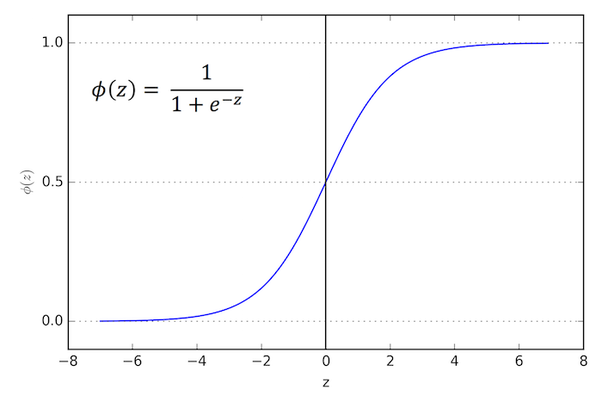


We want to maximize the likelihood that a random data point gets classified correctly, which is called Maximum Likelihood Estimation. Maximum Likelihood Estimation is a general approach to estimating parameters in statistical models. You can maximize the likelihood using different methods like an optimization algorithm such as gradient descent or Newton's method.

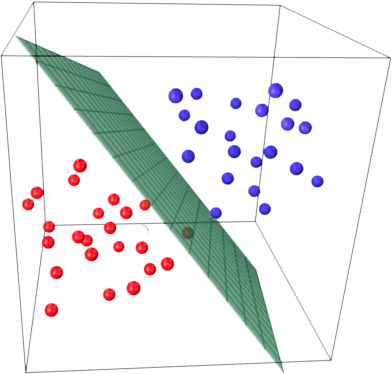

Image source : http://blog.sairahul.com/2014/01/linear-separability.html <br/>
More explanation here : https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf <br/>
Intuitive breakdown here : https://machinelearningmastery.com/logistic-regression-for-machine-learning/

In [105]:
# Starting with Logistic Regression.

from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(C = 2)

In [106]:
logistic_regressor.fit(X_training_set,y_training_set)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
log_regression_pred = logistic_regressor.predict(X_validation_set)

In [165]:
logistic_new = logistic_regressor.predict(new_test_transformed)

In [180]:
pd.DataFrame({'target':logistic_new})['target'].value_counts()

0    123
1      1
Name: target, dtype: int64

# Understanding Accuracy metrics

<b>1.True Positives (TP):</b> True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)
Ex: The case where a person is actually having cancer(1) and the model classifying his case as cancer(1) comes under True positive.

<b>2.True Negatives (TN):</b> True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False

Ex: The case where a person NOT having cancer and the model classifying his case as Not cancer comes under True Negatives.

<b>3.False Positives (FP):</b> False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). False is because the model has predicted incorrectly and positive because the class predicted was a positive one. (1)

Ex: A person NOT having cancer and the model classifying his case as having cancer comes under False Positives.

<b>4.False Negatives (FN):</b> False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). False is because the model has predicted incorrectly and negative because the class predicted was a negative one. (0)

Ex: A person having cancer and the model classifying his case as No-cancer comes under False Negatives.

### Minimization and Trade offs :

We know that there will be some error associated with every model that we use for predicting the true class of the target variable. This will result in False Positives and False Negatives(i.e Model classifying things incorrectly as compared to the actual class).

There’s no hard and fast rule that says what should be minimised in all the situations. It purely depends on the business needs and the context of the problem you are trying to solve. Based on that, we might want to minimise either False Positives or False negatives.

### Accuracy:
Accuracy in classification problems is the number of correct predictions made by the model over all kinds predictions made.
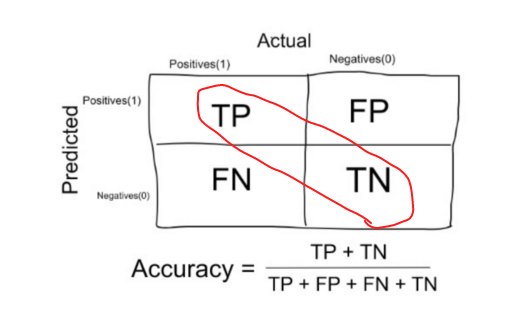


### Precision:
Precision talks about how precise/accurate the model is out of those predicted positive, how many of them are actual positive.
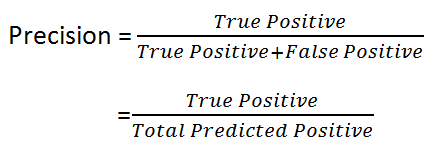


### Recall - True Positive Rate:
What percent of the positive cases did the model catch (predicted positive) amongst all positive cases. Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive.
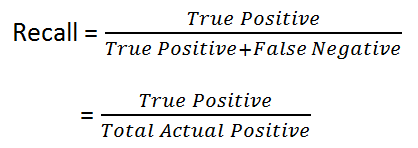


### False Positive Rate:
<b>False Positive Rate = False Positives / (False Positives + True Negatives) </b>


### F-1 Score:
F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
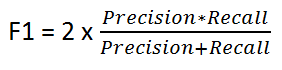


### ROC (receiver operating characteristic) Curve:
A curve of true positive rate vs. false positive rate at different classification thresholds.

### AUROC (Area under ROC):
An evaluation metric that considers all possible classification thresholds.

The Area Under the ROC curve is the probability that a classifier will be more confident that a randomly chosen positive example is actually positive than that a randomly chosen negative example is positive.

image source : https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

https://en.wikipedia.org/wiki/F1_score

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [109]:
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,log_regression_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,log_regression_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,log_regression_pred))

The accuracy in general is :  0.920111550173


The classification report is as follows:
              precision    recall  f1-score   support

          0       0.92      1.00      0.96     93362
          1       0.54      0.01      0.02      8117

avg / total       0.89      0.92      0.88    101479

ROC AUC score is:  0.504328069721


We want to predict the probabilty of not paying a loan, so we use the model predict.proba method. 
This returns an m x 2 array where m is the number of datapoints.
The first column is the probability of the target being 0 and the second column is the probability of the 
target being 1. We want the probability the loan is not repaid, so we will select the second column.

In [110]:
log_regression_pred_test = logistic_regressor.predict_proba(test_transformed)

In [111]:
# selecting the second column
log_regression_pred_test[:,1]

array([ 0.05672755,  0.19171158,  0.05297943, ...,  0.04046026,
        0.05752758,  0.11962208])

In [112]:
submission_log_regression = test[['SK_ID_CURR']]
submission_log_regression['TARGET'] = log_regression_pred_test[:,1]

In [113]:
submission_log_regression.head(10)

,SK_ID_CURR,TARGET
0,100001,0.056728
1,100005,0.191712
2,100013,0.052979
3,100028,0.030148
4,100038,0.122217
5,100042,0.022622
6,100057,0.020635
7,100065,0.092765
8,100066,0.012447
9,100067,0.065183


In [114]:
submission_log_regression.to_csv("log_regression.csv",index=False)

Scored  0.732 in AUROC - Eval by Kaggle.

### 2. Random Forest - Bagging ensemble of Decision trees

A decision tree is a Machine Learning algorithm capable of fitting complex datasets and performing both classification and regression tasks. The idea behind a tree is to search for a pair of variable-value within the training set and split it in such a way that will generate the "best" two child subsets. The goal is to create branches and leafs based on an optimal splitting criteria, a process called tree growing. Specifically, at every branch or node, a conditional statement classifies the data point based on a fixed threshold in a specific variable, therefore splitting the data. To make predictions, every new instance starts in the root node (top of the tree) and moves along the branches until it reaches a leaf node where no further branching is possible.

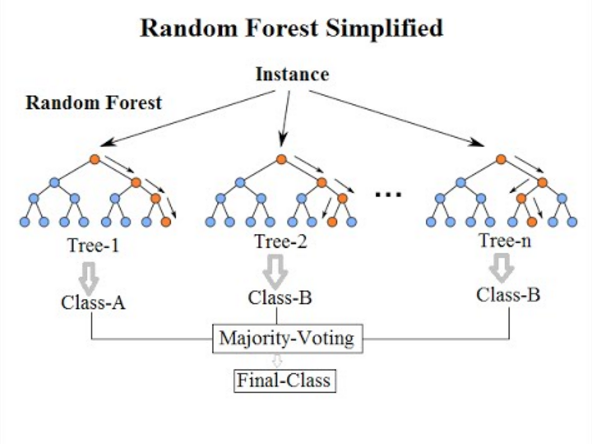
image source: https://www.kdnuggets.com/2017/10/random-forests-explained.html

Random Forests are trained via the bagging method. Bagging or Bootstrap Aggregating, consists of randomly sampling subsets of the training data, fitting a model to these smaller data sets, and aggregating the predictions. This method allows several instances to be used repeatedly for the training stage given that we are sampling with replacement. Tree bagging consists of sampling subsets of the training set, fitting a Decision Tree to each, and aggregating their result.

In relation to sklearn: 


A random forest is a collection of random decision trees (of number n_estimators in sklearn). What you need to understand is how to build one random decision tree.

Roughly speaking, to build a random decision tree you start from a subset of your training samples. At each node you will draw randomly a subset of features (number determined by max_features in sklearn). For each of these features you will test different thresholds and see how they split your samples according to a given criterion (generally entropy or gini, criterion parameter in sklearn). Then you will keep the feature and its threshold that best split your data and record it in the node. When the construction of the tree ends (it can be for different reasons: maximum depth is reached (max_depth in sklearn), minimum sample number is reached (min_samples_leaf in sklearn) etc.) you look at the samples in each leaf and keep the frequency of the labels. As a result, it is like the tree gives you a partition of your training samples according to meaningful features.

As each node is built from features taken randomly, you understand that each tree built in this way will be different. This contributes to the good compromise between bias and variance.

Then in testing mode, a test sample will go through each tree, giving you label frequencies for each tree. The most represented label is generally the final classification result.

https://stackoverflow.com/questions/31344732/a-simple-explanation-of-random-forest<br>
Original paper: https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

In [115]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)

In [116]:
random_forest.fit(X_training_set,y_training_set)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [117]:
random_forest_pred = random_forest.predict(X_validation_set)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    4.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    4.9s finished


In [118]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,random_forest_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,random_forest_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,random_forest_pred))

The accuracy in general is :  0.919983444851


The classification report is as follows:
              precision    recall  f1-score   support

          0       0.92      1.00      0.96     93362
          1       0.49      0.01      0.02      8117

avg / total       0.89      0.92      0.88    101479

ROC AUC score is:  0.504539666323


In [119]:
random_forest_pred_test = random_forest.predict_proba(test_transformed)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.5s finished


In [166]:
random_forest_new = random_forest.predict(new_test_transformed)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


In [182]:
pd.DataFrame({'target':random_forest_new})['target'].value_counts()

0    85
1    39
Name: target, dtype: int64

In [121]:
submission_random_forest = test[['SK_ID_CURR']]
submission_random_forest['TARGET'] = random_forest_pred_test[:,1]

In [122]:
submission_random_forest.to_csv("random_forest.csv",index=False)

Scored  0.679 in AUROC - Eval by Kaggle.

### Feature importance of random forest classifier

In [123]:
# build a dataframe for checking out feature importance

In [124]:
feature_importance_df = pd.DataFrame({'Feature':features,'Importance':random_forest.feature_importances_})

In [125]:
def plot_importance(df):
    """
    Builds the dataset to plot the feature importance.
    
    """
    # Sort features according to importance
    df = df.sort_values(['Importance'],ascending=False).reset_index()
    
    # drop the old index to avoid confusion
    df = df.drop(['index'],axis=1)
    
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 9))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['Importance'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['Feature'].head(30))
    
    plt.xlabel("Normalized feature importance")
    plt.ylabel("Features")
    
    plt.show()
    return df

##  Some of the interaction variables made it to the top 10 of the feature importance plot.

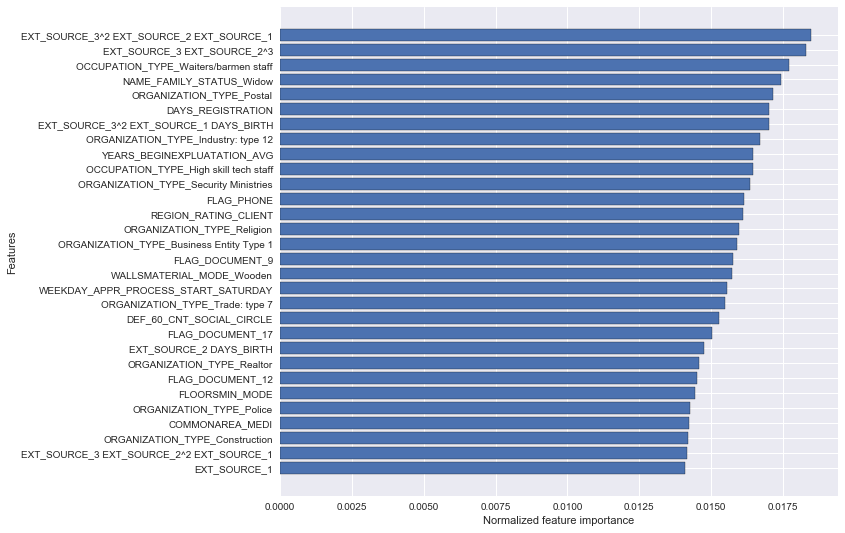

In [126]:
sorted_importance = plot_importance(feature_importance_df)

# What are the top 20 features?

In [127]:
sorted_importance.head(20)

,Feature,Importance
0,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,0.018486
1,EXT_SOURCE_3 EXT_SOURCE_2^3,0.018285
2,OCCUPATION_TYPE_Waiters/barmen staff,0.017693
3,NAME_FAMILY_STATUS_Widow,0.017422
4,ORGANIZATION_TYPE_Postal,0.017168
5,DAYS_REGISTRATION,0.017014
6,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,0.017010
7,ORGANIZATION_TYPE_Industry: type 12,0.016698
8,YEARS_BEGINEXPLUATATION_AVG,0.016456
9,OCCUPATION_TYPE_High skill tech staff,0.016447


# What happened to the domain engineered features?

In [128]:
sorted_importance[(sorted_importance.Feature=='DIR')|
                  (sorted_importance.Feature=='AIR')|
                  (sorted_importance.Feature=='ACR')|
                  (sorted_importance.Feature=='DAR')]

,Feature,Importance
40,DAR,0.012263
49,DIR,0.006102
58,ACR,0.004955
142,AIR,0.001022


Unfortunately, they didn't end up on the top 10!

## 3. Extreme Gradient Boost Model

XGBoost Tree boosting is a highly effective and widely used machine learning method.
The library is laser focused on computational speed and model performance, as such there are few frills. Nevertheless, it does offer a number of advanced features.

### Model Features
The implementation of the model supports the features of the scikit-learn and R implementations, with new additions like regularization. Three main forms of gradient boosting are supported:

<b>Gradient Boosting algorithm also called gradient boosting machine including the learning rate. </b><br>
<b>Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels. </b><br>
<b>Regularized Gradient Boosting with both L1 and L2 regularization.</b></br>

### System Features

The library provides a system for use in a range of computing environments, not least:
Parallelization of tree construction using all of your CPU cores during training.<br>
Distributed Computing for training very large models using a cluster of machines.<br>
Out-of-Core Computing for very large datasets that don’t fit into memory.<br>
Cache Optimization of data structures and algorithm to make best use of hardware.<br>

### Algorithm Features

The implementation of the algorithm was engineered for efficiency of compute time and memory resources. A design goal was to make the best use of available resources to train the model. Some key algorithm implementation features include:

<b>Sparse Aware implementation with automatic handling of missing data values.</b><br>
<b>Block Structure to support the parallelization of tree construction.</b><br>
<b>Continued Training so that you can further boost an already fitted model on new data</b><br>


### Benchmark

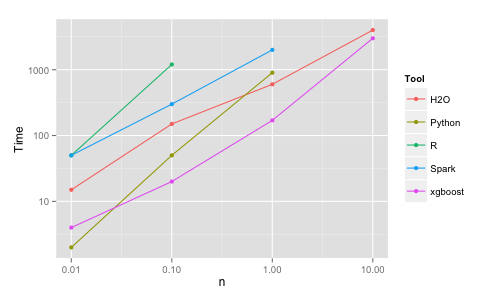
Image source: http://datascience.la/benchmarking-random-forest-implementations/


### Gradient Boosting
Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.


### Level-wise Tree Growth
Tree growth is levelwise as shown: 

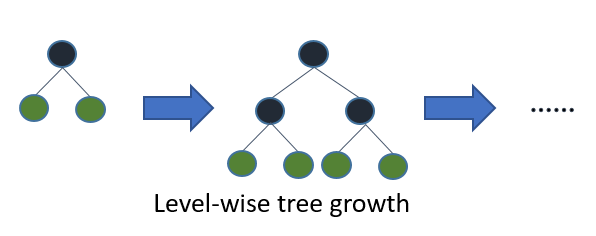
image source: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/


Link to Paper: http://delivery.acm.org/10.1145/2940000/2939785/p785-chen.pdf?ip=24.180.58.36&id=2939785&acc=CHORUS&key=4D4702B0C3E38B35%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35%2E6D218144511F3437&__acm__=1534839698_b4c1981ee9aff25a9ef1d8394ff10dea

Original PPT from founder: https://speakerdeck.com/datasciencela/tianqi-chen-xgboost-overview-and-latest-news-la-meetup-talk

In [129]:
from xgboost import XGBClassifier

C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [130]:
xgb_classifier = XGBClassifier(n_estimators=250,max_depth=5)

In [131]:
xgb_classifier.fit(X_training_set,y_training_set)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=250, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [132]:
xgb_pred = xgb_classifier.predict(X_validation_set)

In [167]:
xgb_new = xgb_classifier.predict(new_test_transformed)

In [183]:
pd.DataFrame({'target':xgb_new})['target'].value_counts()

0    113
1     11
Name: target, dtype: int64

In [134]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,xgb_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,xgb_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,xgb_pred))

The accuracy in general is :  0.920633825718


The classification report is as follows:
              precision    recall  f1-score   support

          0       0.92      1.00      0.96     93362
          1       0.59      0.03      0.05      8117

avg / total       0.89      0.92      0.89    101479

ROC AUC score is:  0.5124297736


In [135]:
xgb_pred_test = xgb_classifier.predict_proba(test_transformed)

In [136]:
submission_xgb = test[['SK_ID_CURR']]
submission_xgb['TARGET'] = xgb_pred_test[:,1]

In [137]:
submission_xgb.to_csv("xgb.csv",index=False)

Scored  0.736 in AUROC - Eval by Kaggle.

## XGBoost Feature Importance

In [138]:
xgb_feature_importance_df = pd.DataFrame({'Feature':features,'Importance':xgb_classifier.feature_importances_})

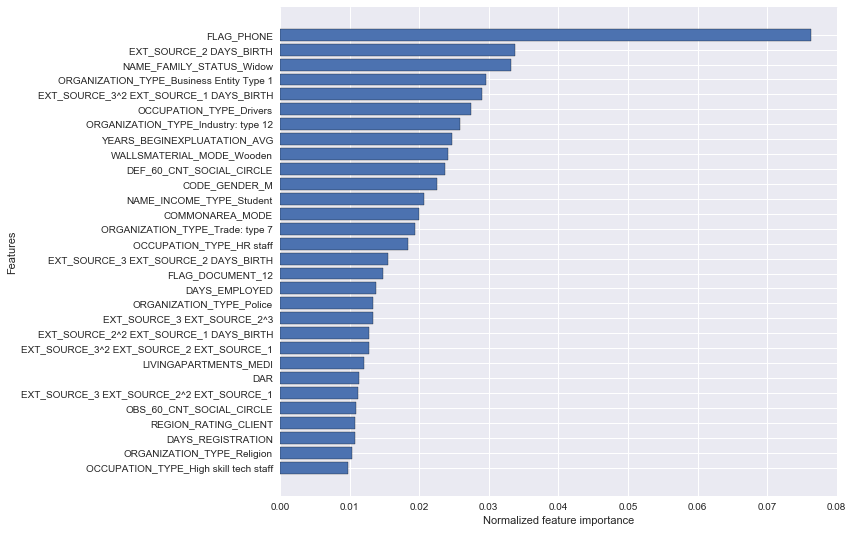

In [139]:
sorted_importance = plot_importance(xgb_feature_importance_df)

## What is the rank of Domain engineered features on this model?

In [140]:
sorted_importance[(sorted_importance.Feature=='DIR')|
                  (sorted_importance.Feature=='AIR')|
                  (sorted_importance.Feature=='ACR')|
                  (sorted_importance.Feature=='DAR')]

,Feature,Importance
23,DAR,0.011295
37,DIR,0.008133
56,ACR,0.004518
144,AIR,0.000753


# What are the top 20 features?

In [141]:
sorted_importance.head(20)

,Feature,Importance
0,FLAG_PHONE,0.076355
1,EXT_SOURCE_2 DAYS_BIRTH,0.033735
2,NAME_FAMILY_STATUS_Widow,0.033133
3,ORGANIZATION_TYPE_Business Entity Type 1,0.029669
4,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,0.029066
5,OCCUPATION_TYPE_Drivers,0.027410
6,ORGANIZATION_TYPE_Industry: type 12,0.025904
7,YEARS_BEGINEXPLUATATION_AVG,0.024699
8,WALLSMATERIAL_MODE_Wooden,0.024096
9,DEF_60_CNT_SOCIAL_CIRCLE,0.023645


## 4. Microsoft's LightGBM

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.

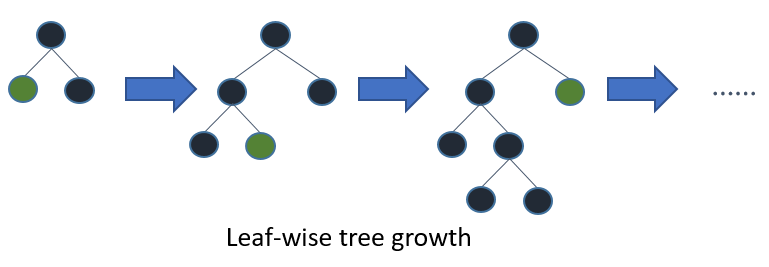
source: https://lightgbm.readthedocs.io/en/latest/Features.html

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm. 

Leaf wise splits lead to increase in complexity and may lead to overfitting and it can be overcome by specifying another parameter max-depth which specifies the depth to which splitting will occur.


In [142]:
import lightgbm as lgb

In [143]:
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=40, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [144]:
lgb_classifier.fit(X_training_set,y_training_set)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=40, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [145]:
lgb_pred = lgb_classifier.predict(X_validation_set)

In [168]:
lgb_new = lgb_classifier.predict(new_test_transformed)

In [184]:
pd.DataFrame({'target':lgb_new})['target'].value_counts()

0    122
1      2
Name: target, dtype: int64

### What is the accuracy score on LightGBM?

In [147]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,lgb_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,lgb_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,lgb_pred))

The accuracy in general is :  0.920348052306


The classification report is as follows:
              precision    recall  f1-score   support

          0       0.92      1.00      0.96     93362
          1       0.56      0.02      0.04      8117

avg / total       0.89      0.92      0.88    101479

ROC AUC score is:  0.508731116413


In [148]:
lgb_feature_importance_df = pd.DataFrame({'Feature':features,'Importance':lgb_classifier.feature_importances_/np.sum(lgb_classifier.feature_importances_)})

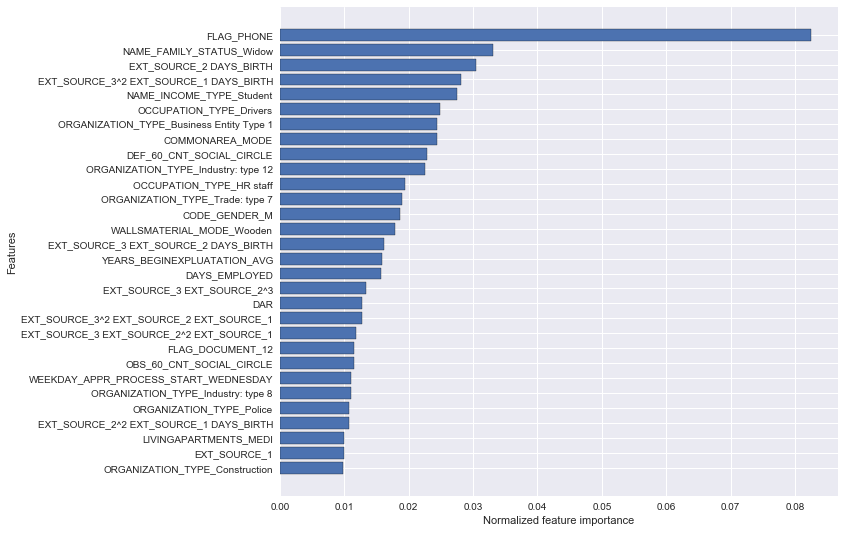

In [149]:
sorted_importance = plot_importance(lgb_feature_importance_df)

## What is the rank of Domain engineered features on this model?

In [150]:
sorted_importance[(sorted_importance.Feature=='DIR')|
                  (sorted_importance.Feature=='AIR')|
                  (sorted_importance.Feature=='ACR')|
                  (sorted_importance.Feature=='DAR')]

,Feature,Importance
18,DAR,0.012821
54,DIR,0.005641
67,ACR,0.004615
126,AIR,0.000769


# What are the top 20 features?

In [151]:
sorted_importance.head(20)

,Feature,Importance
0,FLAG_PHONE,0.082564
1,NAME_FAMILY_STATUS_Widow,0.033077
2,EXT_SOURCE_2 DAYS_BIRTH,0.030513
3,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,0.028205
4,NAME_INCOME_TYPE_Student,0.027436
5,OCCUPATION_TYPE_Drivers,0.024872
6,ORGANIZATION_TYPE_Business Entity Type 1,0.024359
7,COMMONAREA_MODE,0.024359
8,DEF_60_CNT_SOCIAL_CIRCLE,0.022821
9,ORGANIZATION_TYPE_Industry: type 12,0.022564


## 5. Naive Bayes Classifier 

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

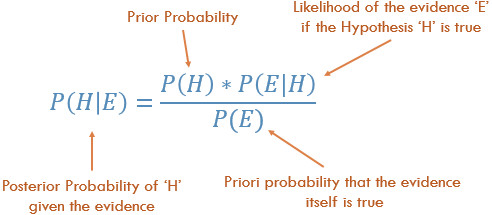

Case example:
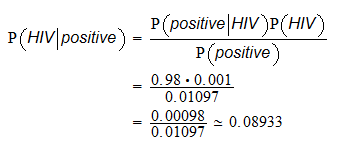
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

https://www.geeksforgeeks.org/naive-bayes-classifiers/

In [152]:
from sklearn.naive_bayes import GaussianNB

In [153]:
bayes_class = GaussianNB()

In [154]:
bayes_class.fit(X_training_set,y_training_set)

GaussianNB(priors=None)

In [155]:
bayes_preds = bayes_class.predict(X_validation_set)

In [169]:
bayes_new = bayes_class.predict(new_test_transformed)

In [185]:
pd.DataFrame({'target':bayes_new})['target'].value_counts()

1    89
0    35
Name: target, dtype: int64

In [157]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,bayes_preds))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,bayes_preds))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,bayes_preds))

The accuracy in general is :  0.326343381389


The classification report is as follows:
              precision    recall  f1-score   support

          0       0.97      0.28      0.43     93362
          1       0.10      0.90      0.18      8117

avg / total       0.90      0.33      0.41    101479

ROC AUC score is:  0.588723825995


#### Accuracy is low, while AUC is large!

In [158]:
bayes_rule_pred_test = bayes_class.predict_proba(test_transformed)

In [159]:
submission_nb = test[['SK_ID_CURR']]
submission_nb['TARGET'] = bayes_rule_pred_test[:,1]
submission_nb.to_csv("nb.csv",index=False)

## 6. Incorporating Ensemble Modeling

### So What is Ensemble Modeling?
https://blog.statsbot.co/ensemble-learning-d1dcd548e936

Ensemble model combines multiple individual models together and delivers superior prediction power. Basically, an ensemble is a supervised learning technique for combining multiple weak learners/ models to produce a strong learner. Ensemble model works better, when we ensemble models with low correlation.



## Bagging - Voting

Bagging stands for bootstrap aggregation. One way to reduce the variance of an estimate is to average together multiple estimates. For example, we can train M different trees on different subsets of the data (chosen randomly with replacement) and compute the ensemble:



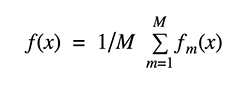

Bagging uses bootstrap sampling to obtain the data subsets for training the base learners. For aggregating the outputs of base learners, bagging uses voting for classification and averaging for regression.

## Boosting - Weight updates 
Boosting refers to a family of algorithms that are able to convert weak learners to strong learners. The main principle of boosting is to fit a sequence of weak learners− models that are only slightly better than random guessing, such as small decision trees− to weighted versions of the data. More weight is given to examples that were misclassified by earlier rounds.

The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction. The principal difference between boosting and the committee methods, such as bagging, is that base learners are trained in sequence on a weighted version of the data.

## Image difference between bagging and boosting

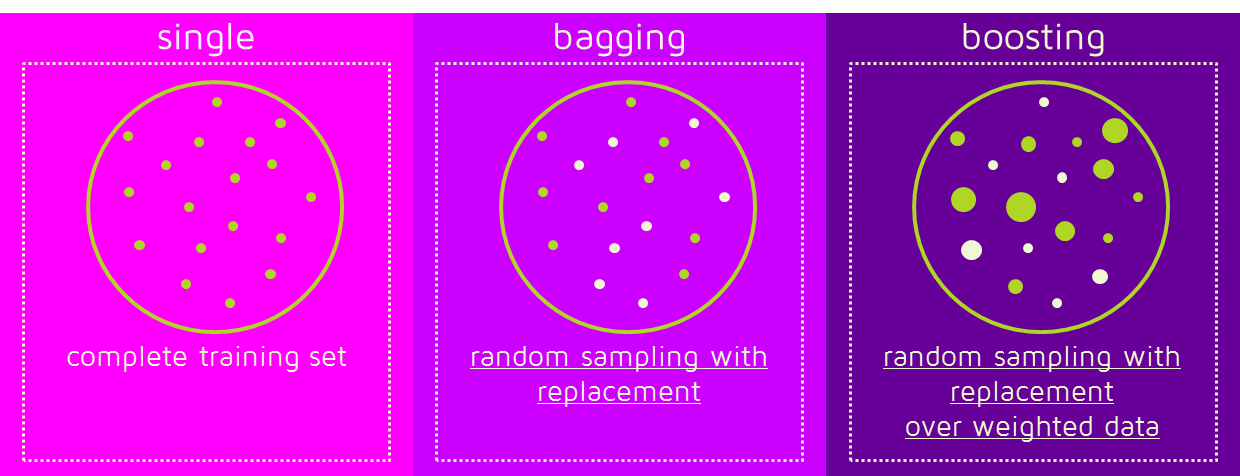
https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

### Stacking
Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on a complete training set, then the meta-model is trained on the outputs of the base level model as features.

The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous. 

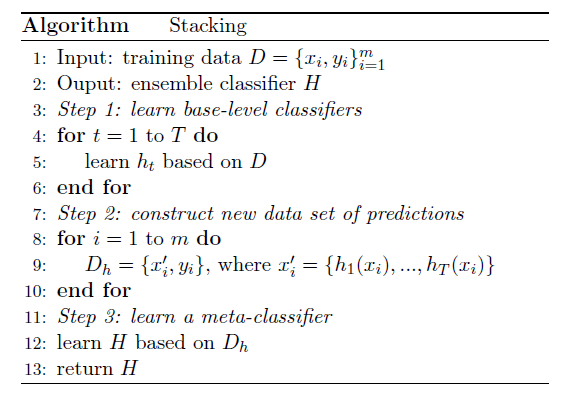

## Building a stacked model - Voting Approach (Bagging)

In [160]:
from scipy import stats
def stacked_model(X_training_set):
    """
    This method performs the stacked ensambling of all the models - XGBoost, LGBoost, Random forest, 
    Naive Bayes,Logistic Regression.
    """  
    stacked_predictions = np.array([])

    for element in X_training_set:
         stacked_predictions = np.append(stacked_predictions,stats.mode(element)[0][0])

    return stacked_predictions

### Combine all the test results into a multidimensional array to feed into the stacked model.

In [161]:
combined_array = (pd.DataFrame({'LR':log_regression_pred,
                                'XGB':xgb_pred,
                                'LGB':lgb_pred,
                                'RF':random_forest_pred,
                                'Bayes':bayes_preds}).values)

In [173]:
combined_new = (pd.DataFrame({'LR':logistic_new,
                                'XGB':xgb_new,
                                'LGB':lgb_new,
                                'RF':random_forest_new,
                                'Bayes':bayes_new}).values)

### Make Predictions from the stacked model.

In [162]:
stacked_model_pred = stacked_model(combined_array)

In [186]:
stacked_new = stacked_model(combined_new).astype(int)

In [187]:
pd.DataFrame({'target':stacked_new})['target'].value_counts()

0    119
1      5
Name: target, dtype: int64

### How is the Accuracy?

In [163]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,stacked_model_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,stacked_model_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,stacked_model_pred))

The accuracy in general is :  0.920466303373


The classification report is as follows:
              precision    recall  f1-score   support

          0       0.92      1.00      0.96     93362
          1       0.59      0.02      0.04      8117

avg / total       0.89      0.92      0.88    101479

ROC AUC score is:  0.508795382389


In [164]:
new_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_2^3 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,DIR,AIR,ACR,DAR
0,100002,0,0,1,0,0.0,0.0,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
1,100003,0,0,0,0,0.0,0.0,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
2,100004,1,1,1,0,0.0,0.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
3,100006,0,0,1,0,0.0,0.0,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
4,100007,0,0,1,0,0.0,0.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
